In [1]:
from envs.train_env import Electric_Car
from models.baseline import BaselineModel
from models.baseline2 import BaselineModel2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from models.tabular_qlearning import TabularQLearning
from envs.feature_engineering import DataHelper
import torch

In [2]:
dh = DataHelper()

def learn(env, model):
    states, rewards, infos = [], [], []
    truncated = False
    terminated = False
    while(terminated == False and truncated == False):
        action = model.predict(env)
        obs, reward, termination, truncation, info = env.step(action)
        new_obs = dh.process_data(obs)

        states.append(new_obs)
        rewards.append(reward)
        terminated = termination
        truncated = truncation
        infos.append(info)

    return states, rewards, terminated, truncated, infos

Please wait, the algorithm is learning! The current simulation is 0
Average reward  -146341.85278225012
Please wait, the algorithm is learning! The current simulation is 2
Average reward  -113516.26223636328
The simulation is done!


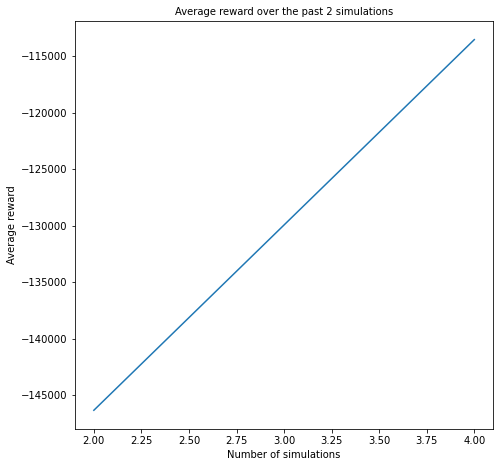

In [3]:
data_path_train = 'data/train.xlsx'
data_path_test = 'data/validate.xlsx'

simulations = 4
simulations_per_average = 2
learning_rate = 0.1
epsilon = 0.05
epsilon_decay = simulations
adaptive_epsilon = True
adapting_learning_rate = True
discount_rate = 0

bin_size = [4, 4, 12, 3] # price, battery, hours, actions
state_vars_qtable = [0, 1, 2]

model = TabularQLearning(data_path_train, discount_rate, bin_size, state_vars_qtable)
model.train(simulations, simulations_per_average, learning_rate, epsilon, epsilon_decay, adaptive_epsilon, adapting_learning_rate)
model.visualize_rewards()
actions, rewards, states, infos = model.play(data_path_test)

Total entries 576 
Zero entries: 150
Total revenue -5899.5458981481615


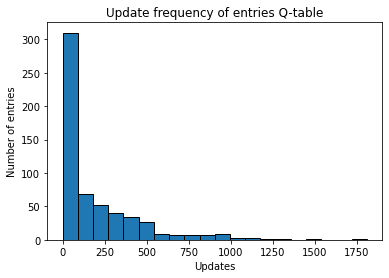

In [6]:
print('Total entries', model.Qtable.size, '\nZero entries:', np.sum(model.Qtable == 0))
print('Total revenue', sum(rewards))

flattened_data = model.Qtable_updates.flatten()
plt.hist(flattened_data, bins=20, edgecolor='black')
plt.title('Update frequency of entries Q-table')
plt.xlabel('Updates')
plt.ylabel('Number of entries')
plt.show()

In [5]:
'''
10 simulations: 

Total entries 1500 
Zero entries: 322
Total revenue -4723.352732500038

50 simulations:

Total entries 1500 
Zero entries: 292
Total revenue -4761.360168888904


'''

'\n10 simulations: \n\nTotal entries 1500 \nZero entries: 322\nTotal revenue -4723.352732500038\n\n50 simulations:\n\nTotal entries 1500 \nZero entries: 292\nTotal revenue -4761.360168888904\n\n\n'

In [8]:
bins = [1, 2, 3, 4]
print(np.zeros(tuple(bins)))

[[[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]]]
